In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
from sklearn.feature_selection import VarianceThreshold, mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

## classification problem

In [8]:
data=pd.read_csv('data/customersatisfaction_train.csv',nrows=20000)

In [9]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [10]:
x=data.drop('TARGET',axis=1)
y=data['TARGET']
x.shape, y.shape

((20000, 370), (20000,))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,stratify=y)

### remove constant, quasi constant, and duplicate features

In [21]:
constant_filter=VarianceThreshold(threshold=0.01)
constant_filter.fit(x_train)
x_train_filter=constant_filter.transform(x_train)
x_test_filter=constant_filter.transform(x_test)

In [22]:
x_train_T=x_train_filter.T
x_test_T=x_test_filter.T

x_train_T=pd.DataFrame(x_train_T)
x_test_T=pd.DataFrame(x_test_T)

duplicated_features=x_train_T.duplicated()
features_to_keep=[not index for index in duplicated_features]

x_train_unique=x_train_T[features_to_keep].T
x_test_unique=x_test_T[features_to_keep].T

In [23]:
x_train_unique.shape , x_test_unique.shape , x_train.shape

((16000, 227), (4000, 227), (16000, 370))

### calculate the MI

In [24]:
mi=mutual_info_classif(x_train_unique,y_train)

In [25]:
len(mi)

227

In [26]:
mi

array([2.34426864e-03, 0.00000000e+00, 1.21256369e-02, 5.30581859e-04,
       2.78635820e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.05357463e-04, 1.26349130e-03, 0.00000000e+00, 0.00000000e+00,
       1.73546183e-03, 2.28001808e-04, 6.42094146e-04, 0.00000000e+00,
       0.00000000e+00, 1.88483920e-03, 8.16066656e-04, 0.00000000e+00,
       1.04175504e-03, 5.15748409e-03, 9.10591183e-03, 2.02003040e-03,
       1.93173590e-03, 0.00000000e+00, 1.02577634e-03, 2.22622609e-03,
       1.69948527e-04, 9.80892978e-04, 2.14889674e-03, 3.73811947e-04,
       5.51327492e-04, 0.00000000e+00, 1.19324026e-03, 0.00000000e+00,
       1.53140999e-03, 0.00000000e+00, 1.16761381e-02, 7.95225625e-05,
       0.00000000e+00, 7.39442261e-04, 3.25716545e-03, 0.00000000e+00,
       0.00000000e+00, 1.03693111e-02, 6.56439021e-03, 1.11402535e-02,
       6.54839539e-04, 2.53719218e-03, 6.26994387e-04, 0.00000000e+00,
       2.59867822e-03, 1.11555010e-03, 1.45250186e-03, 0.00000000e+00,
      

In [30]:
mi=pd.Series(mi)
mi.index=x_train_unique.columns

In [32]:
mi.sort_values(ascending=False,inplace=True)

<AxesSubplot:>

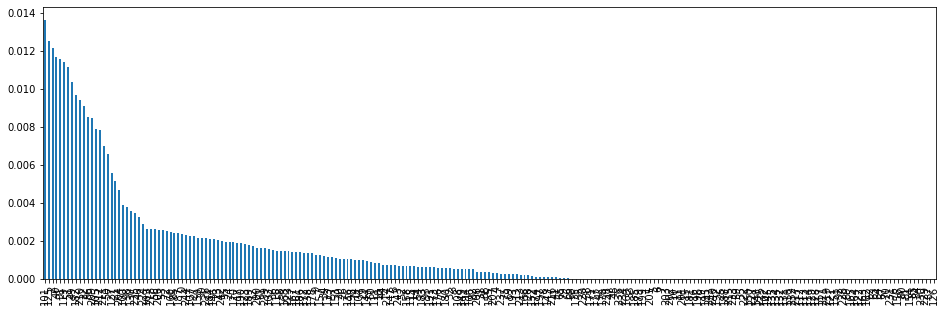

In [33]:
mi.plot.bar(figsize=(16,5))

In [35]:
sel=SelectPercentile(mutual_info_classif,percentile=10).fit(x_train_unique,y_train)
x_train_unique.columns[sel.get_support()]

Int64Index([  2,  22,  30,  40,  49,  51,  86,  91,  95, 100, 101, 105, 119,
            125, 126, 127, 128, 182, 185, 209, 210, 211, 212],
           dtype='int64')

In [37]:
help(sel)

Help on SelectPercentile in module sklearn.feature_selection._univariate_selection object:

class SelectPercentile(_BaseFilter)
 |  SelectPercentile(score_func=<function f_classif at 0x0000028FD4377C18>, *, percentile=10)
 |  
 |  Select features according to a percentile of the highest scores.
 |  
 |  Read more in the :ref:`User Guide <univariate_feature_selection>`.
 |  
 |  Parameters
 |  ----------
 |  score_func : callable
 |      Function taking two arrays X and y, and returning a pair of arrays
 |      (scores, pvalues) or a single array with scores.
 |      Default is f_classif (see below "See also"). The default function only
 |      works with classification tasks.
 |  
 |      .. versionadded:: 0.18
 |  
 |  percentile : int, optional, default=10
 |      Percent of features to keep.
 |  
 |  Attributes
 |  ----------
 |  scores_ : array-like of shape (n_features,)
 |      Scores of features.
 |  
 |  pvalues_ : array-like of shape (n_features,)
 |      p-values of feature s

In [38]:
x_train_mi=sel.transform(x_train_unique)
x_test_mi=sel.transform(x_test_unique)

In [74]:
x_train_mi.shape

(16000, 23)

### build the model and compare the performance

In [44]:
def run_randomforest(x_train,x_test,y_train,y_test):
    clf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print('Accuracy on the set:',accuracy_score(y_test,y_pred))

In [47]:
%%time
run_randomforest(x_train_mi,x_test_mi,y_train,y_test)

Accuracy on the set: 0.9585
Wall time: 462 ms


In [48]:
%%time
run_randomforest(x_train,x_test,y_train,y_test)

Accuracy on the set: 0.9585
Wall time: 1.16 s


## Mutual Information gain in Regressor

In [49]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [53]:
boston=load_boston()

In [51]:
print(boston.DESCR) #집값 예상

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
x=pd.DataFrame(data=boston.data,columns=boston.feature_names)
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [55]:
y=boston.target

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [61]:
mi=mutual_info_regression(x_train,y_train)
mi=pd.Series(mi)
mi.index=x_train.columns
mi.sort_values(ascending=False,inplace=True)
mi

LSTAT      0.685981
RM         0.559517
INDUS      0.503945
PTRATIO    0.483675
NOX        0.457517
TAX        0.385235
CRIM       0.353972
AGE        0.342654
DIS        0.320230
ZN         0.205255
RAD        0.195334
B          0.154858
CHAS       0.007912
dtype: float64

<AxesSubplot:>

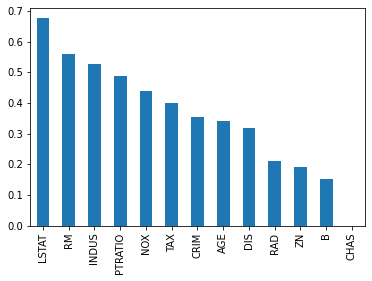

In [60]:
mi.plot.bar()

In [63]:
sel=SelectKBest(mutual_info_regression,k=9).fit(x_train,y_train)
x_train.columns[sel.get_support()]

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

In [64]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [65]:
r2_score(y_test,y_pred)

0.5892223849182524

In [66]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.783509315085124

In [67]:
np.std(y)

9.188011545278203

In [69]:
x_train_9=sel.transform(x_train)
x_test_9=sel.transform(x_test)
x_train_9.shape

(404, 9)

In [70]:
model=LinearRegression()
model.fit(x_train_9,y_train)
y_pred=model.predict(x_test_9)

In [71]:
r2_score(y_test,y_pred)

0.5317127606961576

In [72]:
np.sqrt(mean_squared_error(y_test,y_pred))

6.175103151293747

In [ ]:
#regression 에서는 효과 없음